In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import torch.nn.functional as f

### downloading and formatting data

In [4]:
train=datasets.MNIST(root="./datasets",train=True,transform=transforms.ToTensor(),download=True)
test=datasets.MNIST(root="./datasets",train=False,transform=transforms.ToTensor(),download=True)

Extracting ./datasets\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets\MNIST\raw


Extracting ./datasets\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



Extracting ./datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets\MNIST\raw


Extracting ./datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets\MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


60000 10000
torch.Size([1, 28, 28])


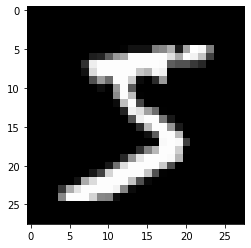

In [22]:
#get more information about our data
print(len(train),len(test))
image,label=train[0]
print(image.shape)
image=image.reshape([28,28])
plt.imshow(image,cmap="gray")


#### shuffling and batching data

In [15]:
train_loader=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)
test_loader=torch.utils.data.DataLoader(test,batch_size=100,shuffle=False)


(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [29]:
# reshape data
data_train_iter=iter(train_loader)
images,labels=data_train_iter.next()
x=images.view(-1,28*28)
#initialize our weights randomly
w=torch.randn(784,10)/np.sqrt(784)
w.requires_grad_()
#initialize our bias to zero
b=torch.zeros(10,requires_grad=True)
print("the shape of inputs x is {}".format(x.shape))
print("the shape of weights w is {}".format(w.shape))
print("the shape of bias b is {}".format(b.shape))
# define our optimizer
optimizer=torch.optim.SGD([w,b],lr=0.1)
for images,labels in tqdm(train_loader):
    optimizer.zero_grad()
    #forward pass:compute prediction and calculate loss
    x=images.view(-1,28*28)
    y=torch.matmul(x,w)+b
    cross_entropy=f.cross_entropy(y,labels)
    #backward pass: compute gradient and perform SGD step
    cross_entropy.backward()
    optimizer.step()

the shape of inputs x is torch.Size([100, 784])
the shape of weights w is torch.Size([784, 10])
the shape of bias b is torch.Size([10])


In [30]:
# test the model
correct=0
total=len(test)
with torch.no_grad():
    for images,labels in tqdm(test):
        x=images.view(-1,28*28)
        y=torch.matmul(x,w)+b
        prediction=torch.argmax(y,dim=1)
        correct+=torch.sum((prediction==labels).float())
print("Test accuracy: {}".format(correct/total))        
        


Test accuracy: 0.9017000198364258
